In [1]:
import pandas as pd
data=pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Best number of neighbors: 8


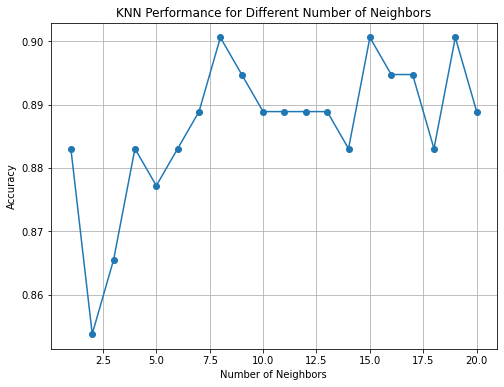

Naïve Bayes Accuracy: 0.9005847953216374


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset from sklearn
from sklearn import datasets

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Select two features and target column
selected_features = ['mean radius', 'mean texture']
target_column = 'target'

# Extract the selected features and target
X = df[selected_features]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make the KNN graph for the best number of neighbors
neighbors_range = range(1, 21)
accuracy_scores = []

for n_neighbors in neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    accuracy_scores.append(knn_model.score(X_test, y_test))

# Find the best number of neighbors
best_n_neighbors = neighbors_range[np.argmax(accuracy_scores)]
print(f'Best number of neighbors: {best_n_neighbors}')

# Plot the KNN graph
plt.figure(figsize=(8, 6))
plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.title('KNN Performance for Different Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Predict test data using Naïve Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_predictions = naive_bayes_model.predict(X_test)

# Evaluate Naïve Bayes performance
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f'Naïve Bayes Accuracy: {nb_accuracy}')

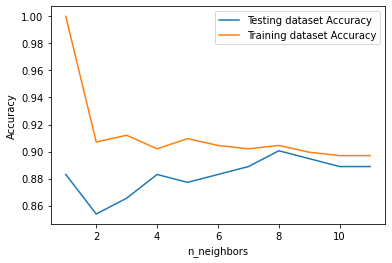

In [3]:
neighbors = np.arange(1, 12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  # Compute training and test data accuracy
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

C:\Users\Manaswini\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


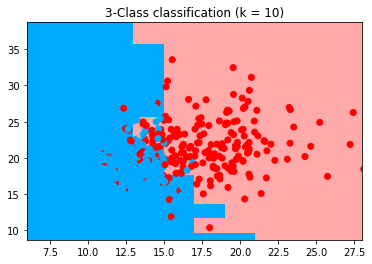

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
n_neighbors = 10
y = y
h = 2

clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

1.0
1.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
X, y = make_blobs(300, 2, centers = 2, cluster_std = 1.5)
model = GaussianNB()
model.fit(X,y)

GaussianNB()

(-14.408345349124948,
 10.096011924928266,
 -9.542453053580225,
 8.957391244613019)

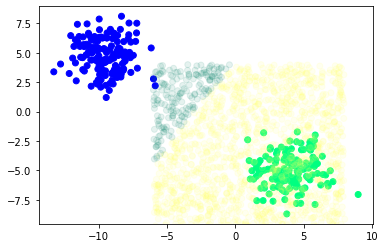

In [7]:
rng = np.random.RandomState(0)
Xnew = [-6, -14]+[14,18] *rng.rand(2000,2)
Xnew
ynew = model.predict(Xnew)
ynew

plt.scatter(X[:,0], X[:,1], c =y , cmap = 'winter')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c =ynew , cmap = 'summer', alpha = 0.1)
plt.axis(lim)

In [8]:
ypred = model.predict_proba(Xnew)
ypred[-10 ,:].round(2)


array([0., 1.])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 1.0

Confusion Matrix:
[[30  0]
 [ 0 30]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

